# ARIMA

## 1. Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.tools import diff
from pandas.plotting import lag_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.eval_measures import rmse
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
# mengganti tema plot menjadi dark
import os
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
%matplotlib inline

## 2. Data

In [2]:
data = pd.read_csv('nila.csv', index_col='Produksi Hasil Tangkap Laut', parse_dates=True)
data.index.freq = 'MS'
data

,Nila
Produksi Hasil Tangkap Laut,
2017-01-01,11.4
2017-02-01,11.6
2017-03-01,11.5
2017-04-01,12.6
2017-05-01,12.5
2017-06-01,13.1
2017-07-01,13.9
2017-08-01,13.2
2017-09-01,14.4


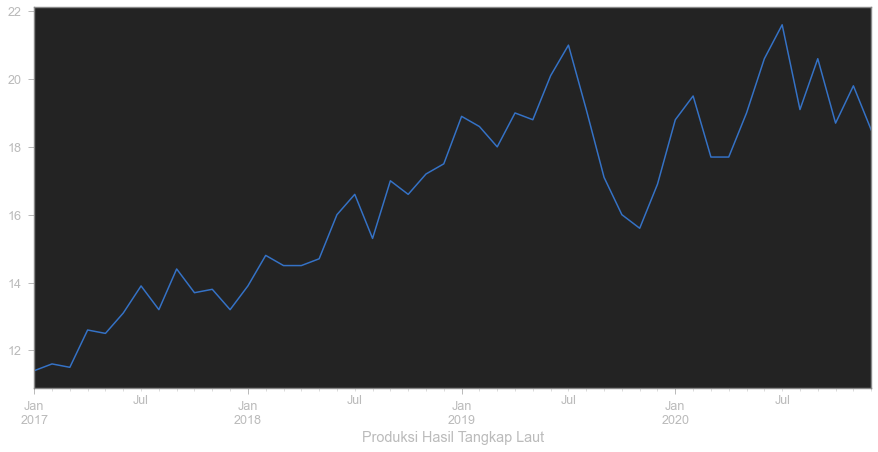

In [3]:
data['Nila'].plot(figsize=(15,7));

## 3. Check Stationarity Data

In [4]:
# augmented dickey-fuller test function
def adfuller_test(series):
    """
    Pass time series, returns ADF report
    """
    print("Augmented Dickey-Fuller Test:")
    result = adfuller(series.dropna())
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    output = pd.Series(result[:4], index=labels)
    
    for key,val in result[4].items():
        output[f'critical value ({key})'] = val
    print(output.to_string())
    
    if result[1] <= 0.05:
        print("\nStrong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("\nWeak evidence against the null hypothesis")
        print("Accept the null hypothesis")
        print("Data has a unit root and is non-stationary")

# try in our data
adfuller_test(data['Nila'])

Augmented Dickey-Fuller Test:
ADF test statistic      -1.949892
p-value                  0.308966
# lags used              0.000000
# observations          47.000000
critical value (1%)     -3.577848
critical value (5%)     -2.925338
critical value (10%)    -2.600774

Weak evidence against the null hypothesis
Accept the null hypothesis
Data has a unit root and is non-stationary


Data is NON-stationary

## 4. Differencing

In [5]:
data['Nila d1'] = diff(data['Nila'], k_diff=1)     #lag 1
# cek stationarity again
adfuller_test(data['Nila d1'])

Augmented Dickey-Fuller Test:
ADF test statistic      -5.487055
p-value                  0.000002
# lags used              2.000000
# observations          44.000000
critical value (1%)     -3.588573
critical value (5%)     -2.929886
critical value (10%)    -2.603185

Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


Data is stationary!

## 5. Check Seasonality Data

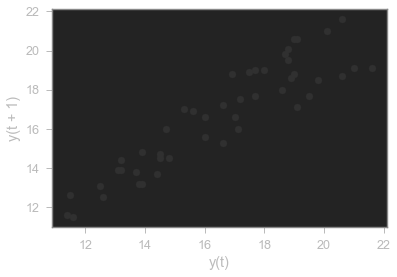

In [6]:
# With lag plot
lag_plot(data['Nila']);

terdapat trend dan seasonality

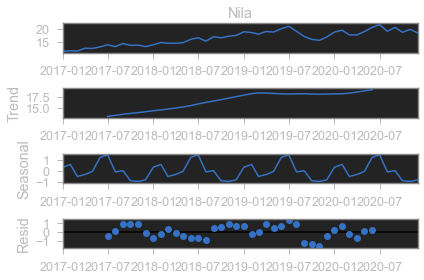

In [7]:
# With ETS (Error, Trend, Seasonality)
result = seasonal_decompose(data['Nila'].dropna(), model='add')  # model='add' for linear
result.plot();

ADA SEASONALITY. Gunakan SARIMA MODEL

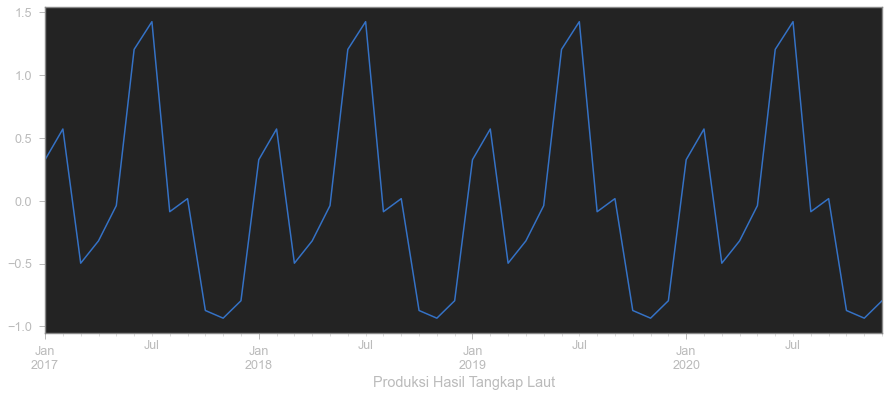

In [8]:
# lihat range seasonalitynya
result.seasonal.plot(figsize=(15,6));

sesoanality terjadi setiap tahun --> m=12

## 6. Find (p,d,q)(P,D,Q)SARIMA Model

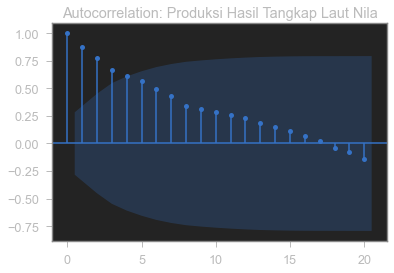

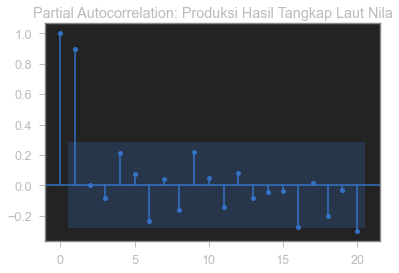

In [9]:
# Plot ACF
lags = 20
title = 'Autocorrelation: Produksi Hasil Tangkap Laut Nila'
plot_acf(data['Nila'],title=title,lags=lags);
# PLOT PACF
lags = 20
title = 'Partial Autocorrelation: Produksi Hasil Tangkap Laut Nila'
plot_pacf(data['Nila'],title=title,lags=lags);

In [10]:
# autoarima
auto_arima(data['Nila'], seasonal=True, stationary=False, m=12, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=143.622, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=146.346, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=144.351, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=145.990, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=145.224, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=inf, Time=1.24 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=inf, Time=1.60 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=1.13 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=144.197, Time=1.02 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=147.527, Time=1.51 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=142.813, Time=0.54 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.56

ARIMA(order=(0, 1, 3), scoring_args={}, seasonal_order=(1, 0, 1, 12),
      suppress_warnings=True)

Gunakan model (0,1,3)(1,0,1)

## 7. Split Data

In [11]:
# Ingin memprediksi 6 bulan berikutnya
train_data = data['Nila'].iloc[:-6]
test_data = data['Nila'].iloc[-6:]

train_data, test_data

(Produksi Hasil Tangkap Laut
 2017-01-01    11.4
 2017-02-01    11.6
 2017-03-01    11.5
 2017-04-01    12.6
 2017-05-01    12.5
 2017-06-01    13.1
 2017-07-01    13.9
 2017-08-01    13.2
 2017-09-01    14.4
 2017-10-01    13.7
 2017-11-01    13.8
 2017-12-01    13.2
 2018-01-01    13.9
 2018-02-01    14.8
 2018-03-01    14.5
 2018-04-01    14.5
 2018-05-01    14.7
 2018-06-01    16.0
 2018-07-01    16.6
 2018-08-01    15.3
 2018-09-01    17.0
 2018-10-01    16.6
 2018-11-01    17.2
 2018-12-01    17.5
 2019-01-01    18.9
 2019-02-01    18.6
 2019-03-01    18.0
 2019-04-01    19.0
 2019-05-01    18.8
 2019-06-01    20.1
 2019-07-01    21.0
 2019-08-01    19.1
 2019-09-01    17.1
 2019-10-01    16.0
 2019-11-01    15.6
 2019-12-01    16.9
 2020-01-01    18.8
 2020-02-01    19.5
 2020-03-01    17.7
 2020-04-01    17.7
 2020-05-01    19.0
 2020-06-01    20.6
 Freq: MS, Name: Nila, dtype: float64,
 Produksi Hasil Tangkap Laut
 2020-07-01    21.6
 2020-08-01    19.1
 2020-09-01    20.6
 20

## 8. SARIMA Train Model

SARIMA(0,1,3)(1,0,1,12)

In [12]:
# model SARIMA in train data
model_train_SARIMA = SARIMAX(train_data, order=(0,1,3), seasonal_order=(1,0,1,12)).fit()
model_train_SARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                 Nila   No. Observations:                   42
Model:             SARIMAX(0, 1, 3)x(1, 0, [1], 12)   Log Likelihood                 -52.771
Date:                              Sun, 12 Dec 2021   AIC                            117.542
Time:                                      20:29:09   BIC                            127.823
Sample:                                  01-01-2017   HQIC                           121.286
                                       - 06-01-2020                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2000      0.190      1.051      0.293      -0.173       0.573
ma.L2         -0.1473      0.167     -0.882      0.378      -0.475       0.180
ma.L3         -0.3287      0.198     -1.659      0.097      -0.717       0.060
ar.S.L12       0.8531      0.655      1.302      0.193      -0.431       2.137
ma.S.L12      -0.4805      1.247     -0.385      0.700      -2.924       1.963
sigma2         0.6562      0.208      3.159      0.002       0.249       1.063
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 3.98
Prob(Q):                              0.79   Prob(JB):                         0.14
Heteroskedasticity (H):               2.44   Skew:                            -0.73
Prob(H) (two-sided):                  0.11   Kurtosis:                         3.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## 9. Test Prediction

In [13]:
start=len(train_data)
end=len(train_data)+len(test_data)-1

prediction_test = model_train_SARIMA.predict(start, end, dynamic=False, typ='levels').rename('SARIMA(0,1,3)(1,0,1,12) Prediction')
prediction_test

2020-07-01    21.003780
2020-08-01    19.526375
2020-09-01    19.176539
2020-10-01    18.602108
2020-11-01    18.578259
2020-12-01    19.062321
Freq: MS, Name: SARIMA(0,1,3)(1,0,1,12) Prediction, dtype: float64

Digunakan typ='levels' krn ingin melihat hasil prediksi dari data asli, bukan data yg sudah didifferencing

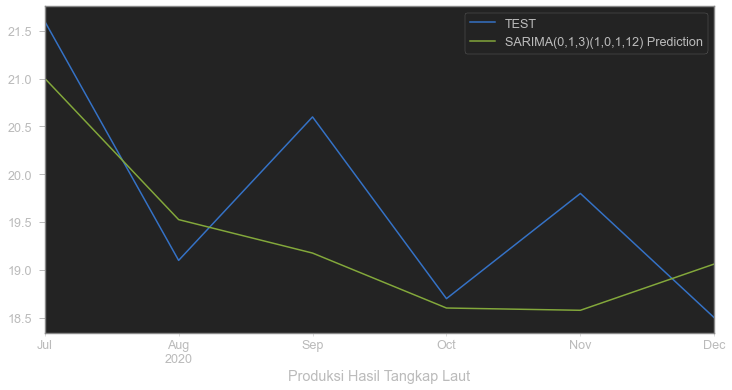

In [14]:
# PLOT
test_data.plot(legend=True, label='TEST')
prediction_test.plot(legend=True, figsize=(12,6));

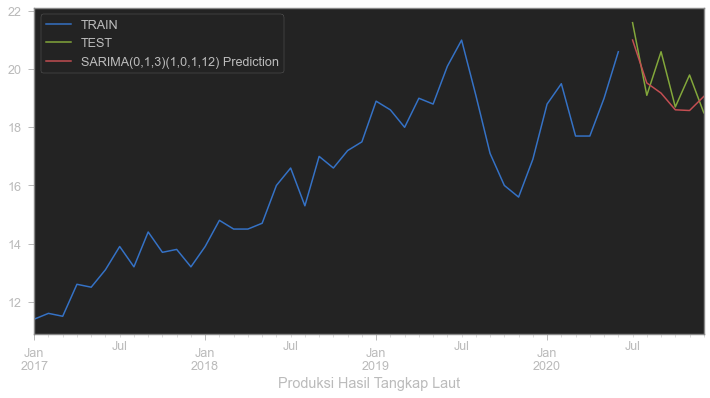

In [15]:
# PLOT
train_data.plot(legend=True, label='TRAIN')
test_data.plot(legend=True, label='TEST')
prediction_test.plot(legend=True, figsize=(12,6));

## 10. Evaluate Model

In [16]:
print('Mean Train data -->', train_data.mean())
print('Standard Deviation Train data -->', train_data.std())
print('\n')

error = rmse(test_data, prediction_test)
print(f'RMSE Error: {error:11.10}')
aic_values = model_train_SARIMA.aic
print(f'AIC: {aic_values:6.5}')
print('\n')

print('Mean Test data -->', test_data.mean())
print('Mean Prediction results -->', prediction_test.mean())

Mean Train data --> 16.09285714285715
Standard Deviation Train data --> 2.654898175176873


RMSE Error: 0.8545910513
AIC: 117.54


Mean Test data --> 19.716666666666665
Mean Prediction results --> 19.324896853448013


## 11. Re-Fit Model to Entire Dataset

In [17]:
model_SARIMA = SARIMAX(data['Nila'], order=(0,1,3), seasonal_order=(1,0,1,12)).fit()
model_SARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                 Nila   No. Observations:                   48
Model:             SARIMAX(0, 1, 3)x(1, 0, [1], 12)   Log Likelihood                 -63.361
Date:                              Sun, 12 Dec 2021   AIC                            138.722
Time:                                      20:29:10   BIC                            149.823
Sample:                                  01-01-2017   HQIC                           142.900
                                       - 12-01-2020                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0165      0.179      0.092      0.927      -0.335       0.368
ma.L2         -0.0441      0.144     -0.307      0.759      -0.326       0.237
ma.L3         -0.3602      0.197     -1.824      0.068      -0.747       0.027
ar.S.L12       0.9994      0.121      8.271      0.000       0.763       1.236
ma.S.L12      -0.9672      3.409     -0.284      0.777      -7.648       5.714
sigma2         0.5941      1.944      0.306      0.760      -3.216       4.405
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                 4.76
Prob(Q):                              0.63   Prob(JB):                         0.09
Heteroskedasticity (H):               4.10   Skew:                            -0.74
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## 12. Forecasting The Future

In [18]:
# forecasting the next 6 months
start = len(data)
end = len(data)+5

forecast = model_SARIMA.predict(start, end, dynamic=False, typ='levels').rename('SARIMA(0,1,3)(1,0,1,12) Forecast')
forecast

2021-01-01    19.830954
2021-02-01    19.925255
2021-03-01    19.739344
2021-04-01    20.155975
2021-05-01    20.395592
2021-06-01    21.350107
Freq: MS, Name: SARIMA(0,1,3)(1,0,1,12) Forecast, dtype: float64

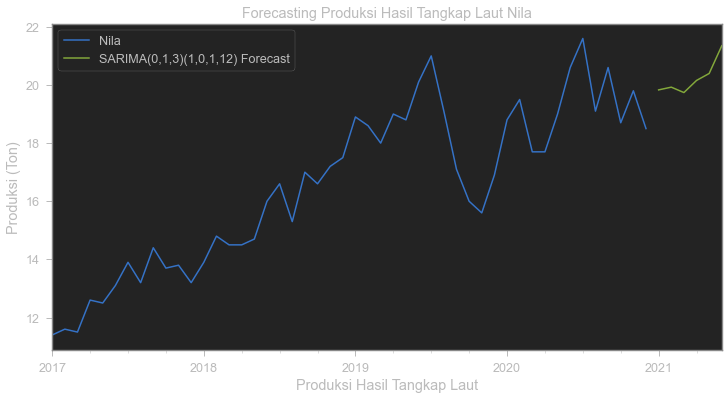

In [19]:
# PLOT
data['Nila'].plot(legend=True)
forecast.plot(figsize=(12,6), legend=True, title='Forecasting Produksi Hasil Tangkap Laut Nila', ylabel='Produksi (Ton)');

In [20]:
# save model
model_SARIMA.save('model_nila.pkl')